In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
import sklearn.metrics as sm
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
np.random.seed(123)

In [29]:
df = pd.read_csv("Train_dataset - Train_data.csv")
df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"124,42,373","119,78,450",878.0,23,32,MEDIUM,219,150,0.700440,10924403,159,4408916,163115
1,Delhi,Delhi,M.C,"110,07,835","98,79,172",858.0,27,30,MEDIUM,215,196,0.920018,9444722,148,2379169,80188
2,Bangalore,Karnataka,MPUA,"84,36,675","43,01,326",936.0,28,37,HIGH,212,102,0.097085,7896728,123,636502,141000
3,Hyderabad,Telangana,MPUA,"68,09,970","36,37,483",930.0,23,31,MEDIUM,217,118,0.827744,6333272,110,126078,55123
4,Ahmedabad,Gujarat,MPUA,"55,70,585","35,20,085",852.0,29,25,LOW,227,109,0.847941,4746138,73,284973,33204


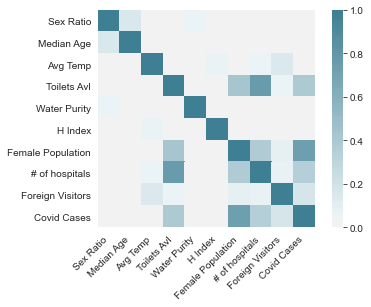

In [30]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [31]:
df = df.drop(['State','Type','Popuation [2001]','Sex Ratio','Population [2011]', 'SWM', ],axis=1)
df.shape

(787, 10)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   Median Age         787 non-null    int64  
 2   Avg Temp           787 non-null    int64  
 3   Toilets Avl        787 non-null    int64  
 4   Water Purity       787 non-null    int64  
 5   H Index            787 non-null    float64
 6   Female Population  787 non-null    int64  
 7   # of hospitals     787 non-null    int64  
 8   Foreign Visitors   787 non-null    int64  
 9   Covid Cases        787 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 61.6+ KB


In [33]:
df.isnull().sum()

City                 0
Median Age           0
Avg Temp             0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

In [34]:
x = df.iloc[:, 1:9]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(629, 8) (629,) (158, 8) (158,)


In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

MAE =  4150.110329044745
The R-square train is:  0.535667268688149
R2 score = 0.6
The mean square error of price and predicted value is:  75537783.83086456


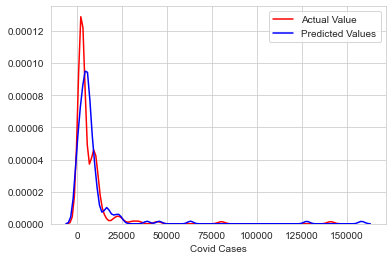

In [36]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(y_test , y_pred)
print('MAE = ', MAE)
print('The R-square train is: ', regressor.score(X_train,y_train))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

MAE =  2758.5194303797466
The R-square is:  0.9504607736342834
R2 score = 0.62
The mean square error of price and predicted value is:  71716900.67379528


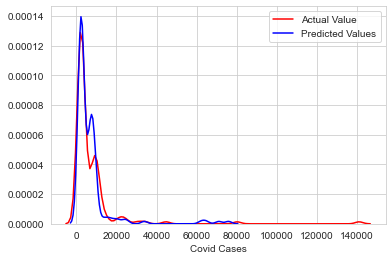

In [37]:
import sklearn.metrics as sm
random = RandomForestRegressor(n_estimators=300, random_state=0)
random.fit(X_train,y_train)
y_pred = random.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred)
print('MAE = ', MAE)
print('The R-square is: ', random.score(X_train,y_train))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)
sns.set_style('whitegrid') 
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [86]:
data = pd.read_csv("Test_dataset - Test_data.csv")
data = data.drop(['State','Type','Popuation [2001]','Sex Ratio', 'Population [2011]', 'SWM', ],axis=1)
data.shape

(501, 9)

In [87]:
data.isnull().sum()

City                  0
Median Age           13
Avg Temp             14
Toilets Avl          22
Water Purity         19
H Index              15
Female Population    15
# of hospitals       17
Foreign Visitors     17
dtype: int64

In [88]:
data['Median Age'].fillna(data['Median Age'].mean(), inplace=True)
data['Avg Temp'].fillna(data['Avg Temp'].mean(), inplace=True)
data['Toilets Avl'].fillna(data['Toilets Avl'].mean(), inplace=True)
data['Water Purity'].fillna(data['Water Purity'].mean(), inplace=True)
data['H Index'].fillna(data['H Index'].mean(), inplace=True)
data['# of hospitals'].fillna(data['# of hospitals'].mean(), inplace=True)
data['Female Population'].fillna(data['Female Population'].mean(), inplace=True)
data['Foreign Visitors'].fillna(data['Foreign Visitors'].mean(), inplace=True)

In [89]:
data.isnull().sum()

City                 0
Median Age           0
Avg Temp             0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
dtype: int64

In [90]:
xtest = data.iloc[:, 1:9]
xtest.head()

,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,23.0,10.0,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,25.0,38.0,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,29.0,35.0,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,26.0,31.0,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,28.0,39.0,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [91]:
yhat = model.predict(xtest)
ranhat = random.predict(xtest)
reshat = regressor.predict(xtest)

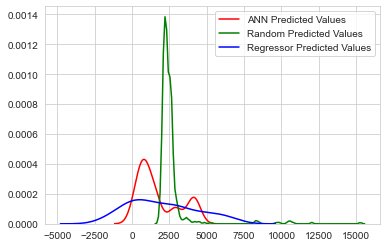

In [92]:
sns.set_style('whitegrid') 
ax1=sns.distplot(yhat, hist=False, color="r", label="ANN Predicted Values")
ax2=sns.distplot(ranhat, hist=False, color="g", label="Random Predicted Values", ax=ax1)
sns.distplot(reshat, hist=False, color="b", label="Regressor Predicted Values", ax=ax2)

In [73]:
ttf=pd.read_csv('Test_dataset - Test_data.csv')
  
# intialise data of lists. 
ds = {'City':ttf['City'],'Covid Cases':ranhat} 
  
# Create DataFrame 
dtf = pd.DataFrame(ds) 
  
# Print the output. 
print(dtf) 

dtf.to_csv('ANN_Result.csv')

             City  Covid Cases
0        Tuensang     1909.585
1    Lakshmeshwar     2278.540
2            Zira     2741.760
3           Yawal     2342.205
4    Thana Bhawan     2462.570
..            ...          ...
496   Nandaprayag     2562.945
497    Kirtinagar     2305.255
498     Kedarnath     2551.245
499      Gangotri     2623.955
500     Kumarganj     2258.210

[501 rows x 2 columns]
